In [1]:
import pandas as pd

# Load the CSV file (comma-delimited with headers)
df = pd.read_csv('SHARP parameters.csv', encoding='latin1')

print("Raw Data:")
print(df.head())

# Replace commas with dots (if any numeric values are written with commas)
df = df.replace({',': '.'}, regex=True)

# List of numeric columns (based on your file structure)
column_names = [
    'TOTUSJH', 'TOTPOT', 'TOTUSJZ', 'ABSNJZH',
    'SAVNCPP', 'USFLUX', 'AREA_ACR', 'MEANPOT',
    'R_VALUE', 'SHRGT45'
]

# Convert numeric columns to float
for col in column_names:
    df[col] = df[col].astype(float)

print("\nDataFrame after conversion to float:")
print(df.head())

# Handle missing values
df.fillna(0, inplace=True)

# Optional: Drop target variable only if it exists
if 'Flare Class' in df.columns:
    df = df.drop(columns=['Flare Class'])

print("\nCleaned DataFrame info:")
print(df.info())


Raw Data:
      AR Level          time     TOTUSJH        TOTPOT       TOTUSJZ  \
0  11087     C  2.010070e+11  1546.07117  1.880000e+23  3.520000e+13   
1  11087     C  2.010070e+11  1576.17102  1.850000e+23  3.540000e+13   
2  11087     C  2.010070e+11  1541.61536  1.840000e+23  3.460000e+13   
3  11087     C  2.010070e+11  1513.67334  1.780000e+23  3.350000e+13   
4  11087     C  2.010070e+11  1500.87524  1.780000e+23  3.280000e+13   

      ABSNJZH       SAVNCPP        USFLUX    AREA_ACR     MEANPOT   R_VALUE  \
0  199.093048  1.230000e+13  2.320000e+22  1040.24500  3571.15796  4.039355   
1  202.304810  1.190000e+13  2.300000e+22  1042.34155  3606.92065  4.033038   
2  207.779266  1.250000e+13  2.240000e+22  1061.44800  3704.31665  3.918000   
3  211.844406  1.210000e+13  2.180000e+22  1063.97314  3764.69434  4.050465   
4  228.475067  1.350000e+13  2.150000e+22  1060.85229  3809.68823  4.103357   

     SHRGT45  
0  15.130448  
1  14.820939  
2  15.041314  
3  14.913166  
4  15.1

In [2]:
# SCALE DATA (feature variables)

from itertools import combinations
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df[column_names])
scaled_df = pd.DataFrame(scaled_data, columns=column_names)

for column in column_names:
    df[column] = scaled_df[column]


print("\nScaled Data:")
print(df.head())



Scaled Data:
      AR Level          time   TOTUSJH    TOTPOT   TOTUSJZ   ABSNJZH  \
0  11087     C  2.010070e+11 -0.424403 -0.620660 -0.312650 -0.256511   
1  11087     C  2.010070e+11 -0.405977 -0.625893 -0.306220 -0.248014   
2  11087     C  2.010070e+11 -0.427131 -0.627638 -0.331940 -0.233532   
3  11087     C  2.010070e+11 -0.444236 -0.638104 -0.367304 -0.222779   
4  11087     C  2.010070e+11 -0.452071 -0.638104 -0.389808 -0.178784   

    SAVNCPP    USFLUX  AREA_ACR   MEANPOT   R_VALUE   SHRGT45  
0  0.014268 -0.248790 -0.328663 -1.169480 -0.380209 -1.355155  
1 -0.014714 -0.258022 -0.326543 -1.160947 -0.391541 -1.377943  
2  0.028759 -0.285716 -0.307221 -1.137710 -0.597903 -1.361718  
3 -0.000223 -0.313411 -0.304668 -1.123305 -0.360280 -1.371153  
4  0.101213 -0.327259 -0.307824 -1.112570 -0.265398 -1.350949  


In [3]:
# CREATE INTERACTION FEATURES

import itertools
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Ensure the column names are strings
    df.columns = [str(col) for col in df.columns]

    # Generate combinations of column names
    combos = list(combinations(df.columns, 2))

    # Create the column names for the interaction terms
    colnames = list(df.columns) + ['_'.join(combo) for combo in combos]

    # Create PolynomialFeatures object
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df_transformed = poly.fit_transform(df)

    # Create a DataFrame with the original and interaction columns
    df_interactions = pd.DataFrame(df_transformed, columns=colnames)

    # Remove columns where all values are zero (no interaction)
    noint_indices = [i for i, x in enumerate((df_interactions == 0).all()) if x]
    df_interactions = df_interactions.drop(df_interactions.columns[noint_indices], axis=1)

    return df_interactions

# Add interaction features
df_interactions = add_interactions(scaled_df)
print("Data with Interaction Features:")
print(df_interactions.head())



Data with Interaction Features:
    TOTUSJH    TOTPOT   TOTUSJZ   ABSNJZH   SAVNCPP    USFLUX  AREA_ACR  \
0 -0.424403 -0.620660 -0.312650 -0.256511  0.014268 -0.248790 -0.328663   
1 -0.405977 -0.625893 -0.306220 -0.248014 -0.014714 -0.258022 -0.326543   
2 -0.427131 -0.627638 -0.331940 -0.233532  0.028759 -0.285716 -0.307221   
3 -0.444236 -0.638104 -0.367304 -0.222779 -0.000223 -0.313411 -0.304668   
4 -0.452071 -0.638104 -0.389808 -0.178784  0.101213 -0.327259 -0.307824   

    MEANPOT   R_VALUE   SHRGT45  ...  USFLUX_AREA_ACR  USFLUX_MEANPOT  \
0 -1.169480 -0.380209 -1.355155  ...         0.081768        0.290955   
1 -1.160947 -0.391541 -1.377943  ...         0.084255        0.299549   
2 -1.137710 -0.597903 -1.361718  ...         0.087778        0.325062   
3 -1.123305 -0.360280 -1.371153  ...         0.095486        0.352056   
4 -1.112570 -0.265398 -1.350949  ...         0.100738        0.364098   

   USFLUX_R_VALUE  USFLUX_SHRGT45  AREA_ACR_MEANPOT  AREA_ACR_R_VALUE  \
0    

Matplotlib is building the font cache; this may take a moment.


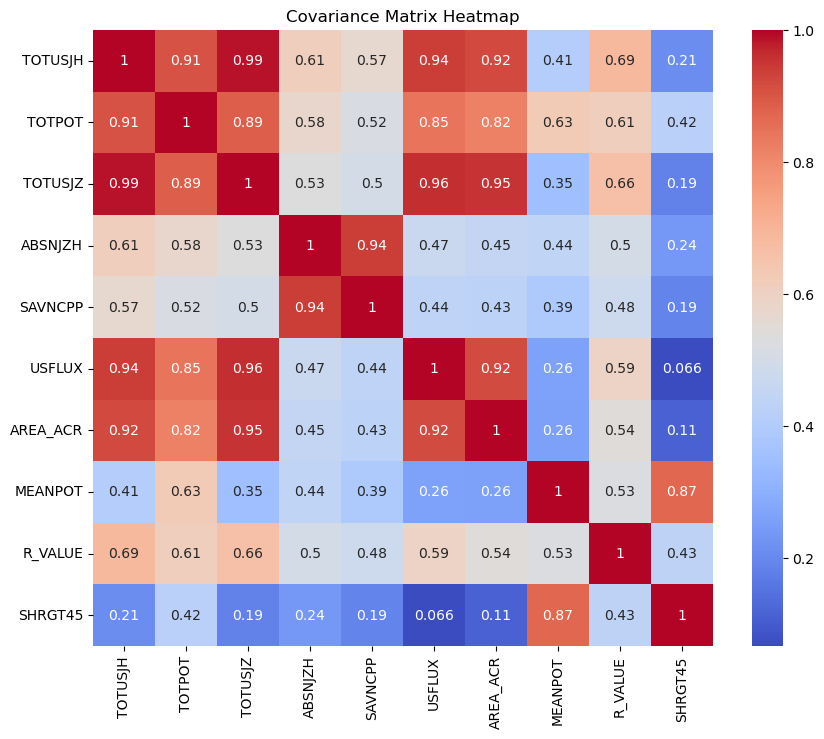

In [4]:
# COVARIANCE HEATMAP
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import seaborn as sns
%matplotlib inline

cov_matrix = scaled_df.cov()

# Plot the covariance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')
plt.title("Covariance Matrix Heatmap")
plt.show()

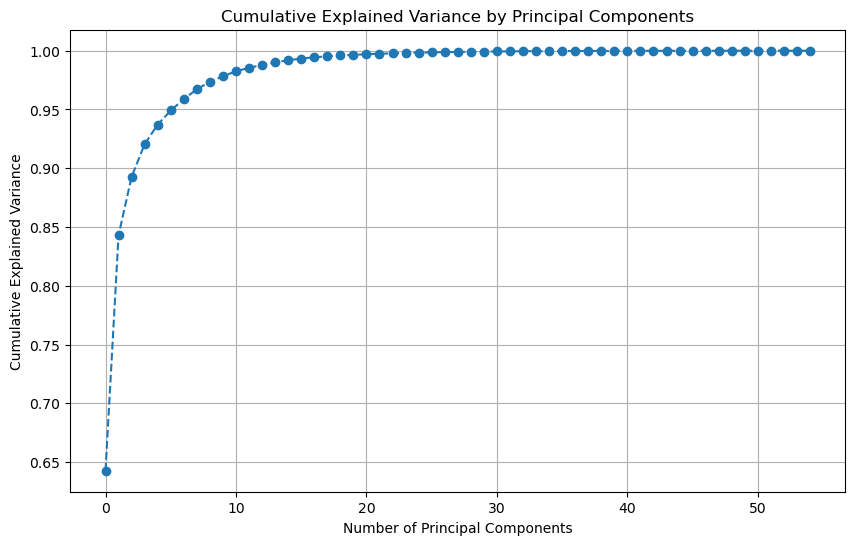

Number of components to explain 95.0% variance: 7


In [5]:
# DETERMINE CUMMULATIVE EXPLAINED VARIANCE (= total amount of variance captured by a certain number of principal components)
import numpy as np
# Ensure your data (X) is standardized before applying PCA
from sklearn.decomposition import PCA

pca = PCA()
# Fit PCA on the data
pca.fit(df_interactions)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid()
plt.show()

# Determine the number of components to explain desired variance (e.g., 95%)
variance_threshold = 0.95
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= variance_threshold) + 1

print(f"Number of components to explain {variance_threshold*100}% variance: {n_components}")


In [6]:
# TARGET VARAIABLE (Solar flare class) ENCODING FROM GOES CLASS TO NUMERIC (hierarchical)

import pandas as pd

def encode_flare_class(flare_class):
    # Handle missing or non-string values
    if pd.isna(flare_class):
        return None
    
    flare_class = str(flare_class).strip().upper()
    
    # Skip empty strings
    if flare_class == "":
        return None
    
    main_class = flare_class[0]  # first letter (A, B, C, M, X)
    
    # Extract the numeric part safely
    numeric_part = flare_class[1:].strip()
    if numeric_part.isdigit():
        sub_class = int(numeric_part)
    else:
        sub_class = 0  # default if no number present
    
    # Mapping for the main class
    mapping = {'A': 0, 'B': 100, 'C': 200, 'M': 300, 'X': 400}
    
    # Return encoded value (default 0 if unexpected letter)
    return mapping.get(main_class, 0) + sub_class

# Apply encoding to your dataframe
df['flare_class_encoded'] = df['Level'].apply(encode_flare_class)

In [7]:
# Display original and encoded columns side-by-side
print(df[['Level', 'flare_class_encoded']].head(20))

   Level  flare_class_encoded
0      C                  200
1      C                  200
2      C                  200
3      C                  200
4      C                  200
5      C                  200
6      C                  200
7      C                  200
8      C                  200
9      C                  200
10     C                  200
11     C                  200
12     C                  200
13     C                  200
14     C                  200
15     C                  200
16     C                  200
17     C                  200
18     C                  200
19     C                  200


In [8]:
# Assuming df_interactions is your feature data
# and df contains the target column 'Level'

# Step 1: Encode the target variable
df['flare_class_encoded'] = df['Level'].apply(encode_flare_class)

# Step 2: Apply PCA (as before)
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

pca = PCA()
pca.fit(df_interactions)

# Choose components based on variance threshold (e.g., 95%)
variance_threshold = 0.95
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= variance_threshold) + 1

pca_opt = PCA(n_components=n_components)
principal_components = pca_opt.fit_transform(df_interactions)

# Step 3: Create PCA dataframe
pca_df = pd.DataFrame(
    principal_components,
    columns=[f"PC{i+1}" for i in range(n_components)]
)

# Step 4: Add the encoded target column
pca_df['flare_class_encoded'] = df['flare_class_encoded']

# Step 5: Export to CSV for modeling
pca_df.to_csv("pca_with_encoded_target.csv", index=False)

print(f"✅ PCA data with {n_components} components and encoded target exported successfully!")

✅ PCA data with 7 components and encoded target exported successfully!


In [9]:
# 2️⃣ Add target column (flare class)
df_interactions['flare_class_encoded'] = df['flare_class_encoded'].values

# 3️⃣ Export to CSV
df_interactions.to_csv("interaction_features_with_flare_class.csv", index=False)

print(f"✅ Exported successfully! File saved as 'interaction_features_with_flare_class.csv'")
print(f"Shape: {df_interactions.shape[0]} rows × {df_interactions.shape[1]} columns")

✅ Exported successfully! File saved as 'interaction_features_with_flare_class.csv'
Shape: 11440 rows × 56 columns
